##### OpenCV 偵測人臉，自動加馬賽克
這篇教學會介紹延伸「人臉偵測」文章的範例，搭配 OpenCV 馬賽克的效果，自動偵測影像中的人臉，並將人臉加上馬賽克。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 下載人臉特徵模型 
OpenCV 的官方 Github 提供了許多訓練好的特徵模型，只需要下載後就能使用，請從下方網址進行下載，\
下載後將 xml 檔案和 Python 的程式檔放在同一層目錄下。

[OpenCV 官方 Github](https://github.com/opencv/opencv/tree/4.x/data)
[人臉特徵模型](haarcascade_frontalface_default.xml)

##### 人臉加上馬賽克 
將「人臉偵測」和「馬賽克效果」兩篇文章的範例結合，當影像中偵測到人臉時，透過 x、y 坐標和 w、h 長寬，\
就能定義馬賽克的位置和大小，下面的程式執行後，會自動將蒙娜麗莎的臉加上馬賽克。

* 參考：[人臉偵測](https://steam.oxxostudio.tw/category/python/ai/ai-face-dectection.html)、[馬賽克效果](https://steam.oxxostudio.tw/category/python/ai/opencv-mosaic.html)

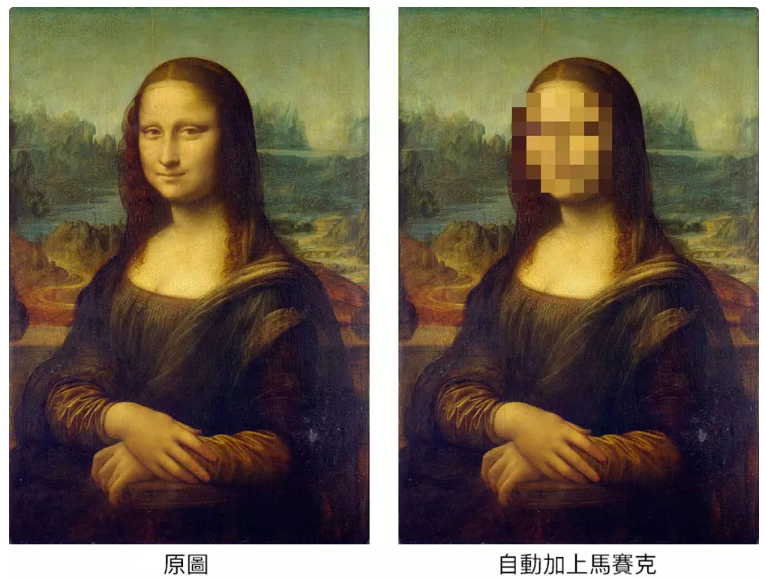

In [6]:
import cv2
img = cv2.imread(r'Img\Face\2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 影像轉換成灰階
face_cascade = cv2.CascadeClassifier(r"Img\Face\haarcascade_frontalface_default.xml") # 載入人臉偵測模型
faces = face_cascade.detectMultiScale(gray,1.2,3)  # 開始辨識影像中的人臉

for (x, y, w, h) in faces:
    mosaic = img[y:y+h, x:x+w]   # 馬賽克區域
    level = 50                   # 馬賽克程度
    mh = int(h/level)            # 根據馬賽克程度縮小的高度
    mw = int(w/level)            # 根據馬賽克程度縮小的寬度
    mosaic = cv2.resize(mosaic, (mw,mh), interpolation=cv2.INTER_LINEAR) # 先縮小
    mosaic = cv2.resize(mosaic, (w,h), interpolation=cv2.INTER_NEAREST)  # 然後放大
    img[y:y+h, x:x+w] = mosaic   # 將指定區域換成馬賽克區域

cv2.imshow('oxxostudio', img)
cv2.waitKey(0)   # 按下任意鍵停止
cv2.destroyAllWindows()

如果有多張人臉，也可以順利偵測，並將偵測到的人臉加上馬賽克 ( 圖片為 Fusilamientos de Torrijos y sus compañeros en las playas de Málaga )。

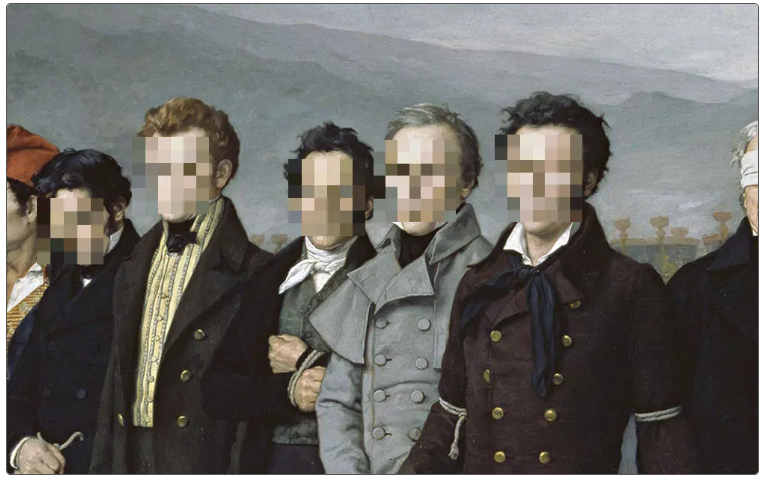

##### 即時偵測影片中的人臉 
延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，搭配人臉偵測的方法，就可以即時偵測攝影鏡頭裡的人臉。

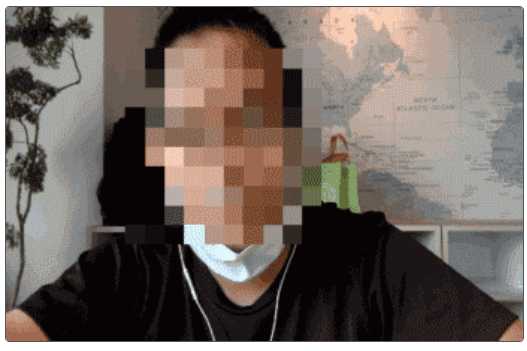

In [2]:
import cv2

# 初始化攝像頭
cap = cv2.VideoCapture(0)

# 載入人臉偵測模型
face_cascade = cv2.CascadeClassifier(r"Model/2/haarcascade_frontalface_default.xml")

# 檢查攝像頭是否打開
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # 讀取影像
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break

    # 縮小尺寸，避免尺寸過大導致效能不好
    frame = cv2.resize(frame, (480, 300))

    # 將影像轉換成灰階
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 偵測人臉
    faces = face_cascade.detectMultiScale(gray)

    # 對每個偵測到的人臉進行馬賽克處理
    for (x, y, w, h) in faces:
        # 擷取人臉區域
        mosaic = frame[y:y+h, x:x+w]
        level = 15  # 馬賽克等級
        mh = int(h / level)
        mw = int(w / level)

        # 縮小人臉區域
        mosaic = cv2.resize(mosaic, (mw, mh), interpolation=cv2.INTER_LINEAR)

        # 放大人臉區域，形成馬賽克效果
        mosaic = cv2.resize(mosaic, (w, h), interpolation=cv2.INTER_NEAREST)

        # 將馬賽克區域放回原影像
        frame[y:y+h, x:x+w] = mosaic

    # 顯示影像
    cv2.imshow('oxxostudio', frame)

    # 按下 'q' 鍵退出
    if cv2.waitKey(1) == ord('q'):
        break

# 釋放攝像頭並關閉所有視窗
cap.release()
cv2.destroyAllWindows()